In [1]:
%cd /content

/content


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from os.path import splitext,basename
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import glob

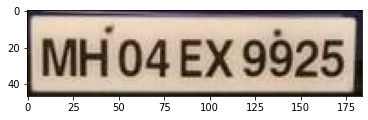

In [50]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cap = cv2.imread("r.png")
capp = cap.copy()
plt.imshow(cap)



(47, 184, 3)
18 20
(60, 30)
15 20
(60, 30)
13 20
(60, 30)
13 21
(60, 30)
12 21
(60, 30)
15 21
(60, 30)
12 21
(60, 30)
13 21
(60, 30)
13 21
(60, 30)
13 21
(60, 30)
length of number plate is 10


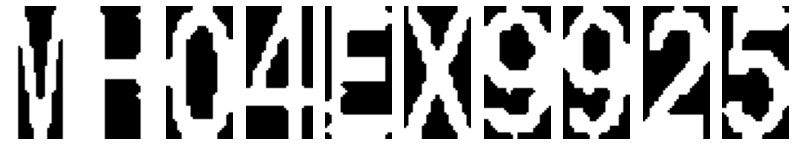

In [51]:
title = ["lib"]
cap2 = cv2.cvtColor(cap,cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(cap2,(5,5),0)
ret, thres = cv2.threshold(cap2, 5, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
#thres2 = cv2.morphologyEx(thres , cv2.MORPH_DILATE,kernel)
cont,heir = cv2.findContours(thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#print(cont)
#sorted_cont = sorted(cv2.UMat(cont),key=lambda ctr: cv2.boundingRect(cont)[0])
print(cap.shape)
sortc = sort_contours(cont)
t_chars = []
for conts in sortc:
	x,y,w,h = cv2.boundingRect(conts)
	
	ratio = h/w
	if 1<=ratio <=3.5:
		
		if (h/cap.shape[0]) >=0.42:
			print(w,h)
			cv2.rectangle(cap,(x,y),(x+w,y+h),(0,255,0),1)
			newcap = thres[y:y+h,x:x+w]
			newcap = cv2.resize(newcap,dsize = (30,60))
			ret ,newcap = cv2.threshold(newcap,150,255,cv2.THRESH_BINARY)
			print(newcap.shape)
			t_chars.append(newcap)
		  


print("length of number plate is {0}".format(str(len(t_chars))))
#cap3 = cv2.drawContours(cap,cont,-1,(255,0,0),1)

fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(t_chars),nrows=1,figure=fig)

for i in range(len(t_chars)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(t_chars[i],cmap="gray")

In [32]:
json_file = open('MobileNets_character_recognition.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_weight.h5")
print("[INFO] Model loaded successfully...")

labels = LabelEncoder()
labels.classes_ = np.load('license_character_classes.npy')
print("[INFO] Labels loaded successfully...")

[INFO] Model loaded successfully...
[INFO] Labels loaded successfully...


In [52]:

# pre-processing input images and pedict with model
def predict_from_model(image,model,labels):
    image = cv2.resize(image,(80,80))
    print(image.shape)
    image = np.stack((image,)*3, axis=-1)
    prediction = labels.inverse_transform([np.argmax(model.predict(image[np.newaxis,:]))])
    return prediction

(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
(80, 80)
license plate no is  NH04EX9925


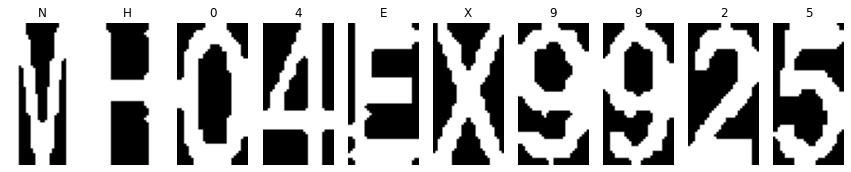

In [53]:
fig = plt.figure(figsize=(15,3))
cols = len(t_chars)
grid = gridspec.GridSpec(ncols=cols,nrows=1,figure=fig)

final_string = ''
for i,character in enumerate(t_chars):
    fig.add_subplot(grid[i])
    title = np.array2string(predict_from_model(character,model,labels))
    plt.title('{}'.format(title.strip("'[]"),fontsize=20))
    final_string+=title.strip("'[]")
    plt.axis(False)
    plt.imshow(character,cmap='gray')

print("license plate no is ",final_string)